import librabries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("./bmi.csv")
df.head()


,Unnamed: 0,`,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0


In [3]:
df = df.drop(["Unnamed: 0", "BMI_tags", "Label"], axis=1)
df = pd.get_dummies(df, columns=['gender'], drop_first=False)
X = df.drop(['calories_to_maintain_weight'], axis=1)
Y = df['calories_to_maintain_weight']
print(X.head())
print(Y.head())

   `  weight(kg)  height(m)        BMI      BMR  activity_level  gender_F  \
0  2   16.097862   0.932025  18.531612  958.584             1.2      True   
1  4   14.619374   0.916687  17.397496  932.383             1.7      True   
2  4   17.899918   0.997288  17.997414  977.578             1.9      True   
3  3   13.532880   1.022786  12.936609  944.689             1.9      True   
4  4   17.039484   1.053977  15.338909  799.229             1.9     False   

   gender_M  
0     False  
1     False  
2     False  
3     False  
4      True  
0    1150.3008
1    1585.0511
2    1857.3982
3    1794.9091
4    1518.5351
Name: calories_to_maintain_weight, dtype: float64


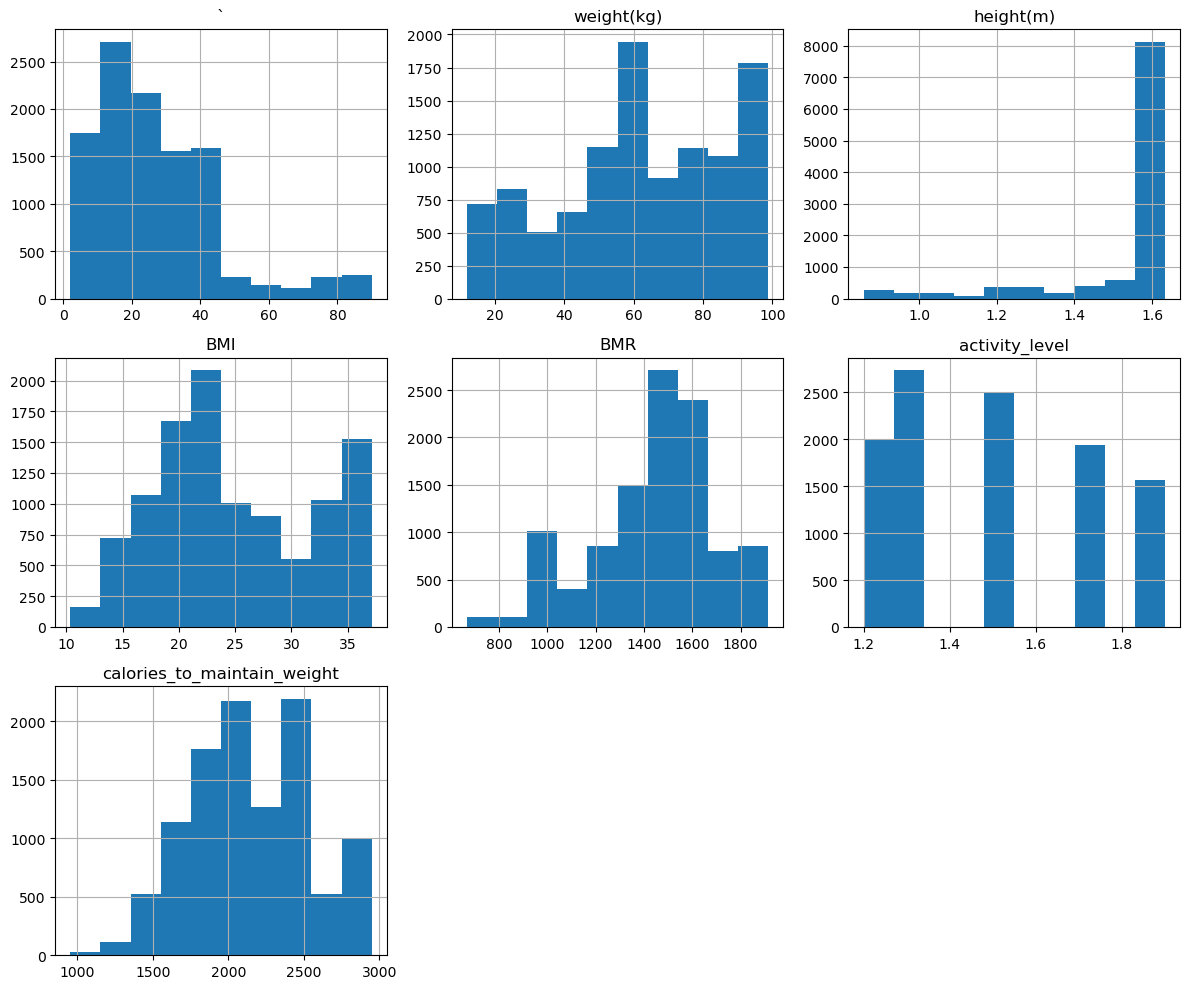

<Figure size 1000x800 with 0 Axes>

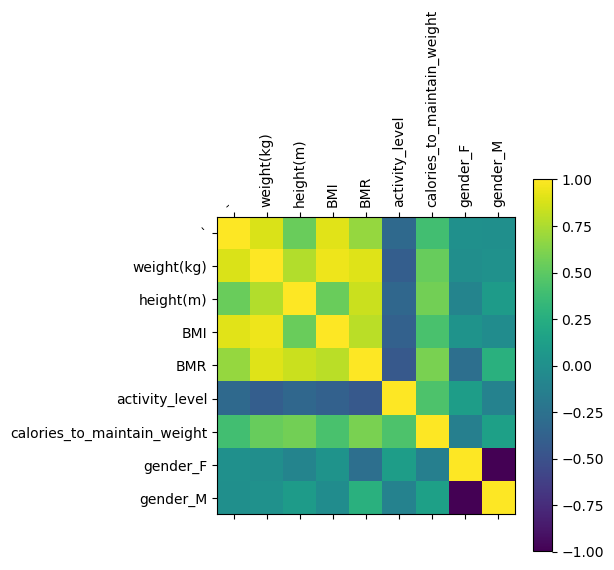

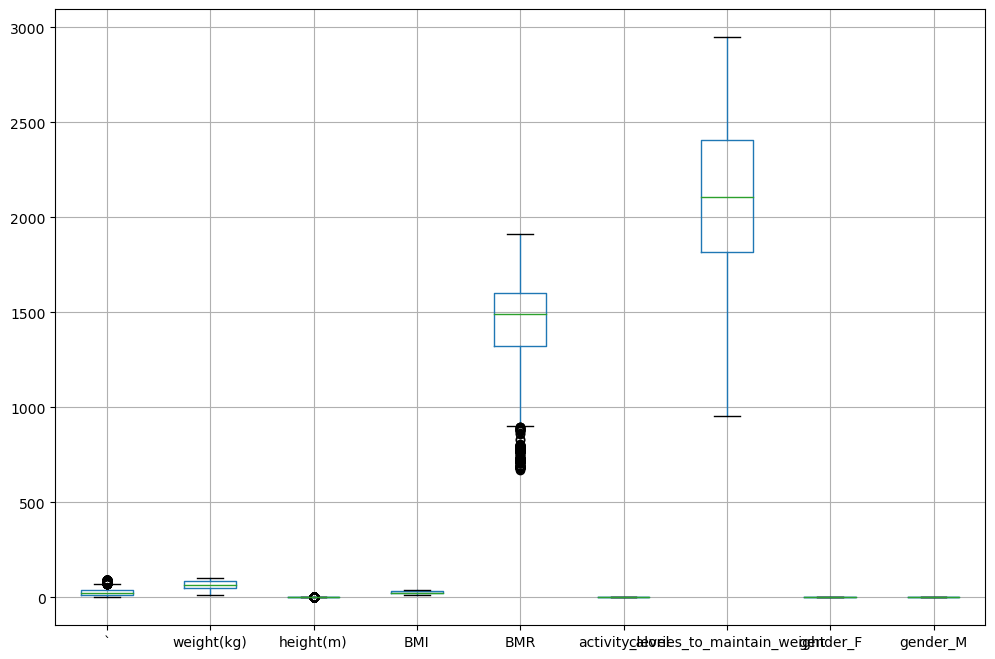

c:\Users\abhay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abhay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abhay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abhay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

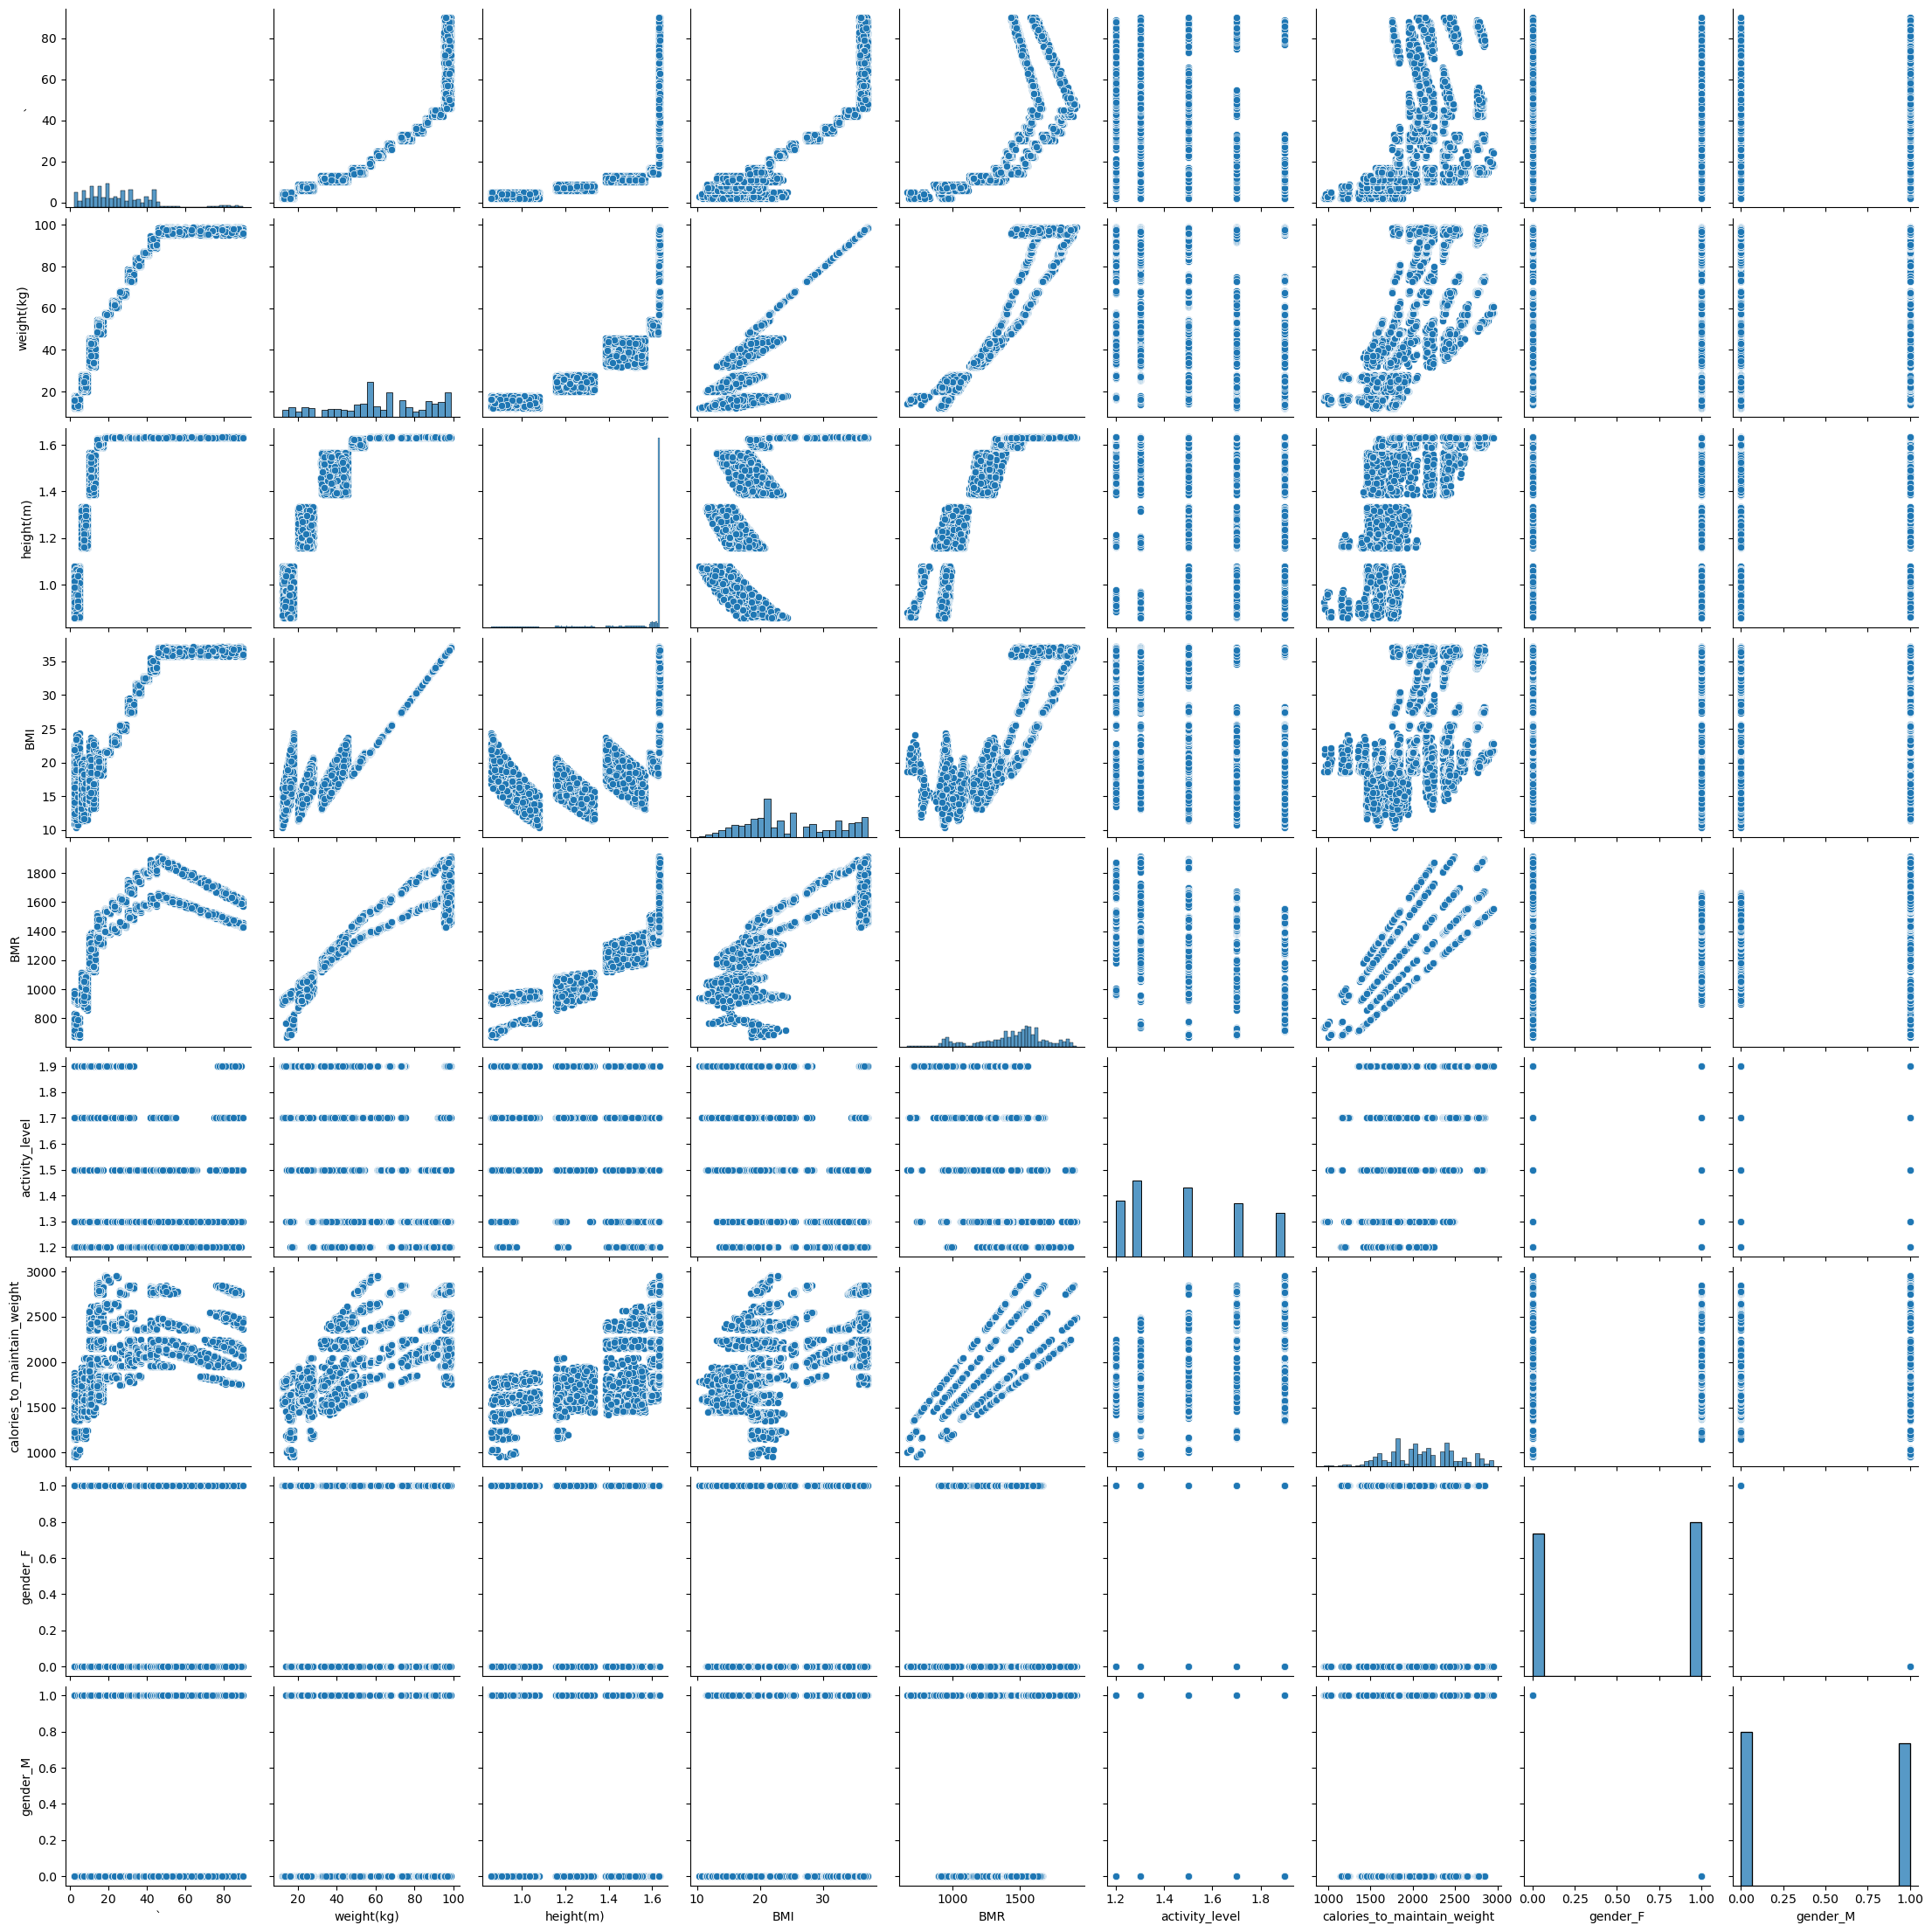

In [4]:
# Visualize the distribution of each numerical column
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation matrix to understand relationships between variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='viridis')
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

# Boxplot for each numerical column
df.boxplot(figsize=(12, 8))
plt.show()

# Pairplot to visualize relationships between pairs of variables
sns.pairplot(df)
plt.show()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
modelLR = LinearRegression()
modelLR.fit(X_train, Y_train)
Y_pred = modelLR.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
accuracy = modelLR.score(X_test, Y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Mean Squared Error: 1966.029133084592
Accuracy: 98.74%


In [6]:

def calculate_bmi(weight_kg, height_m):
    return weight_kg / (height_m ** 2)

def calculate_bmr(age, weight_kg, height_m, gender_F, gender_M):
    if gender_F == 1:  # Female
        return 655 + (9.6 * weight_kg) + (1.8 * height_m * 100) - (4.7 * age)
    elif gender_M == 1:  # Male
        return 66 + (13.7 * weight_kg) + (5 * height_m * 100) - (6.8 * age)
    else:
        raise ValueError("Invalid gender values")

In [7]:
food=pd.read_csv('./food.csv')
food.head()


,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
0,Asparagus Cooked,0,1,1,,22,0.2,2.4,0.91,23.0,14,224.0,4.1,2.0,0,1.3
1,Avocados,1,0,0,0,160,15.0,2.0,0.55,12.0,7,485.0,8.5,6.7,0,0.7
2,Bananas,1,0,0,0,89,0.3,1.1,0.26,5.0,1,358.0,23.0,2.6,0,12.0
3,Bagels made in wheat,0,1,1,0,250,1.5,10.0,2.76,20.0,439,165.0,49.0,4.1,0,6.1
4,Berries,1,0,0,0,349,0.4,14.0,6.80,190.0,298,77.0,77.0,13.0,0,46.0


In [8]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Food_items     89 non-null     object 
 1   Breakfast      89 non-null     int64  
 2   Lunch          89 non-null     int64  
 3   Dinner         89 non-null     int64  
 4   VegNovVeg      89 non-null     object 
 5   Calories       89 non-null     int64  
 6   Fats           89 non-null     float64
 7   Proteins       89 non-null     float64
 8   Iron           89 non-null     float64
 9   Calcium        89 non-null     float64
 10  Sodium         89 non-null     int64  
 11  Potassium      89 non-null     float64
 12  Carbohydrates  89 non-null     float64
 13  Fibre          89 non-null     float64
 14  VitaminD       89 non-null     int64  
 15  Sugars         89 non-null     float64
dtypes: float64(8), int64(6), object(2)
memory usage: 11.3+ KB


In [9]:
food.describe()

,Breakfast,Lunch,Dinner,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.471910,0.505618,0.685393,210.314607,8.577528,8.569663,3.709888,64.503371,250.887640,247.803371,26.473034,2.997753,11.516854,8.005056
std,0.502039,0.502801,0.466990,155.350893,11.383888,8.841861,8.554230,112.045798,323.154074,194.792561,25.051777,5.037179,59.071819,16.444337
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,89.000000,0.400000,2.300000,0.500000,8.300000,7.000000,117.000000,7.000000,0.200000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,184.000000,3.700000,4.500000,1.180000,18.000000,80.000000,211.000000,21.000000,1.500000,0.000000,1.300000
75%,1.000000,1.000000,1.000000,318.000000,12.000000,13.000000,2.780000,63.000000,381.000000,334.000000,33.000000,3.100000,0.000000,5.700000
max,1.000000,1.000000,1.000000,579.000000,50.000000,46.000000,57.000000,631.000000,1531.000000,1129.000000,91.000000,34.000000,435.000000,82.000000


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

food = pd.get_dummies(food, columns=['VegNovVeg'])

# Separate features (X) and target variable (y)
X = food.drop(['Food_items', 'Calories'], axis=1)
y = food['Calories']

# If normalization or standardization is required for numerical features, use StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [11]:
pip install matplotlib seaborn pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import matplotlib.pyplot as plt

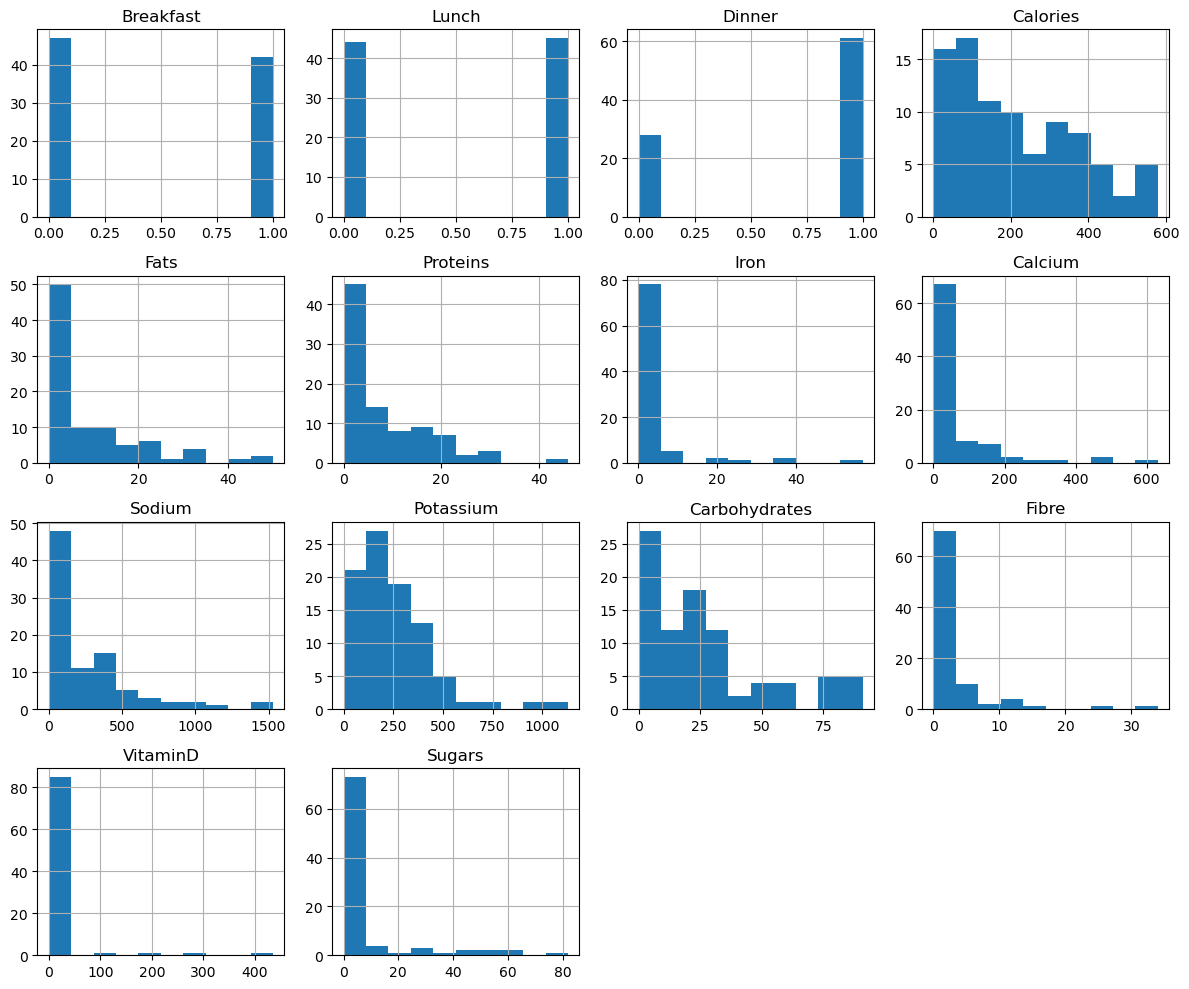

<Figure size 1000x800 with 0 Axes>

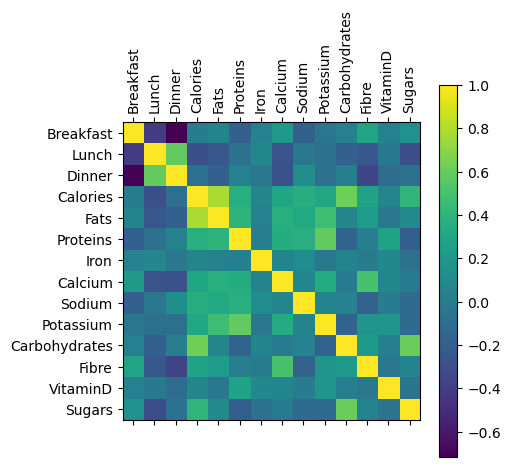

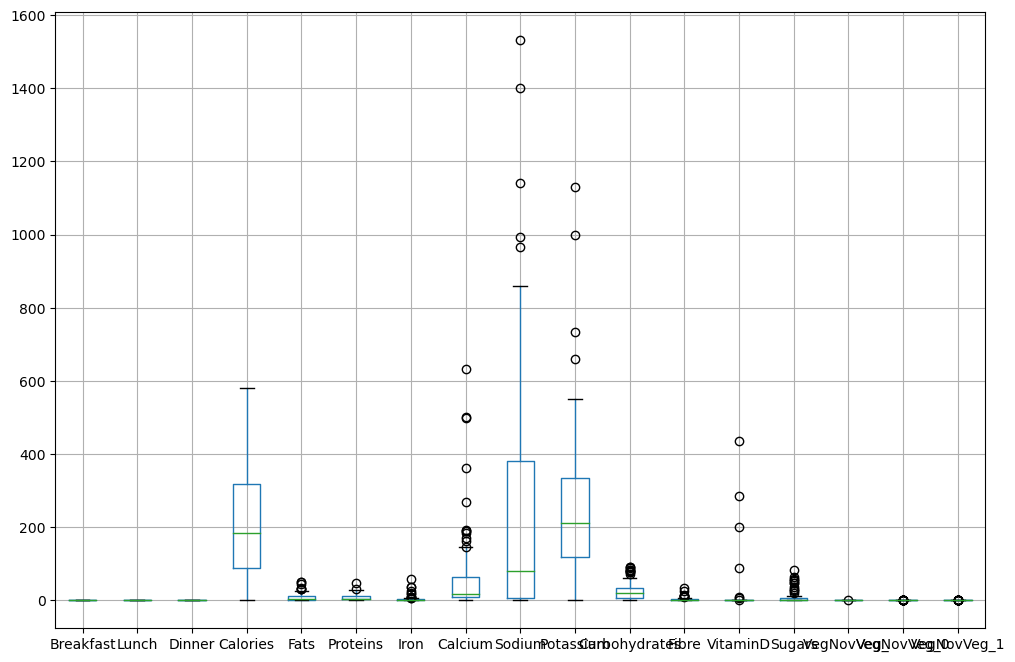

c:\Users\abhay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abhay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abhay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abhay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

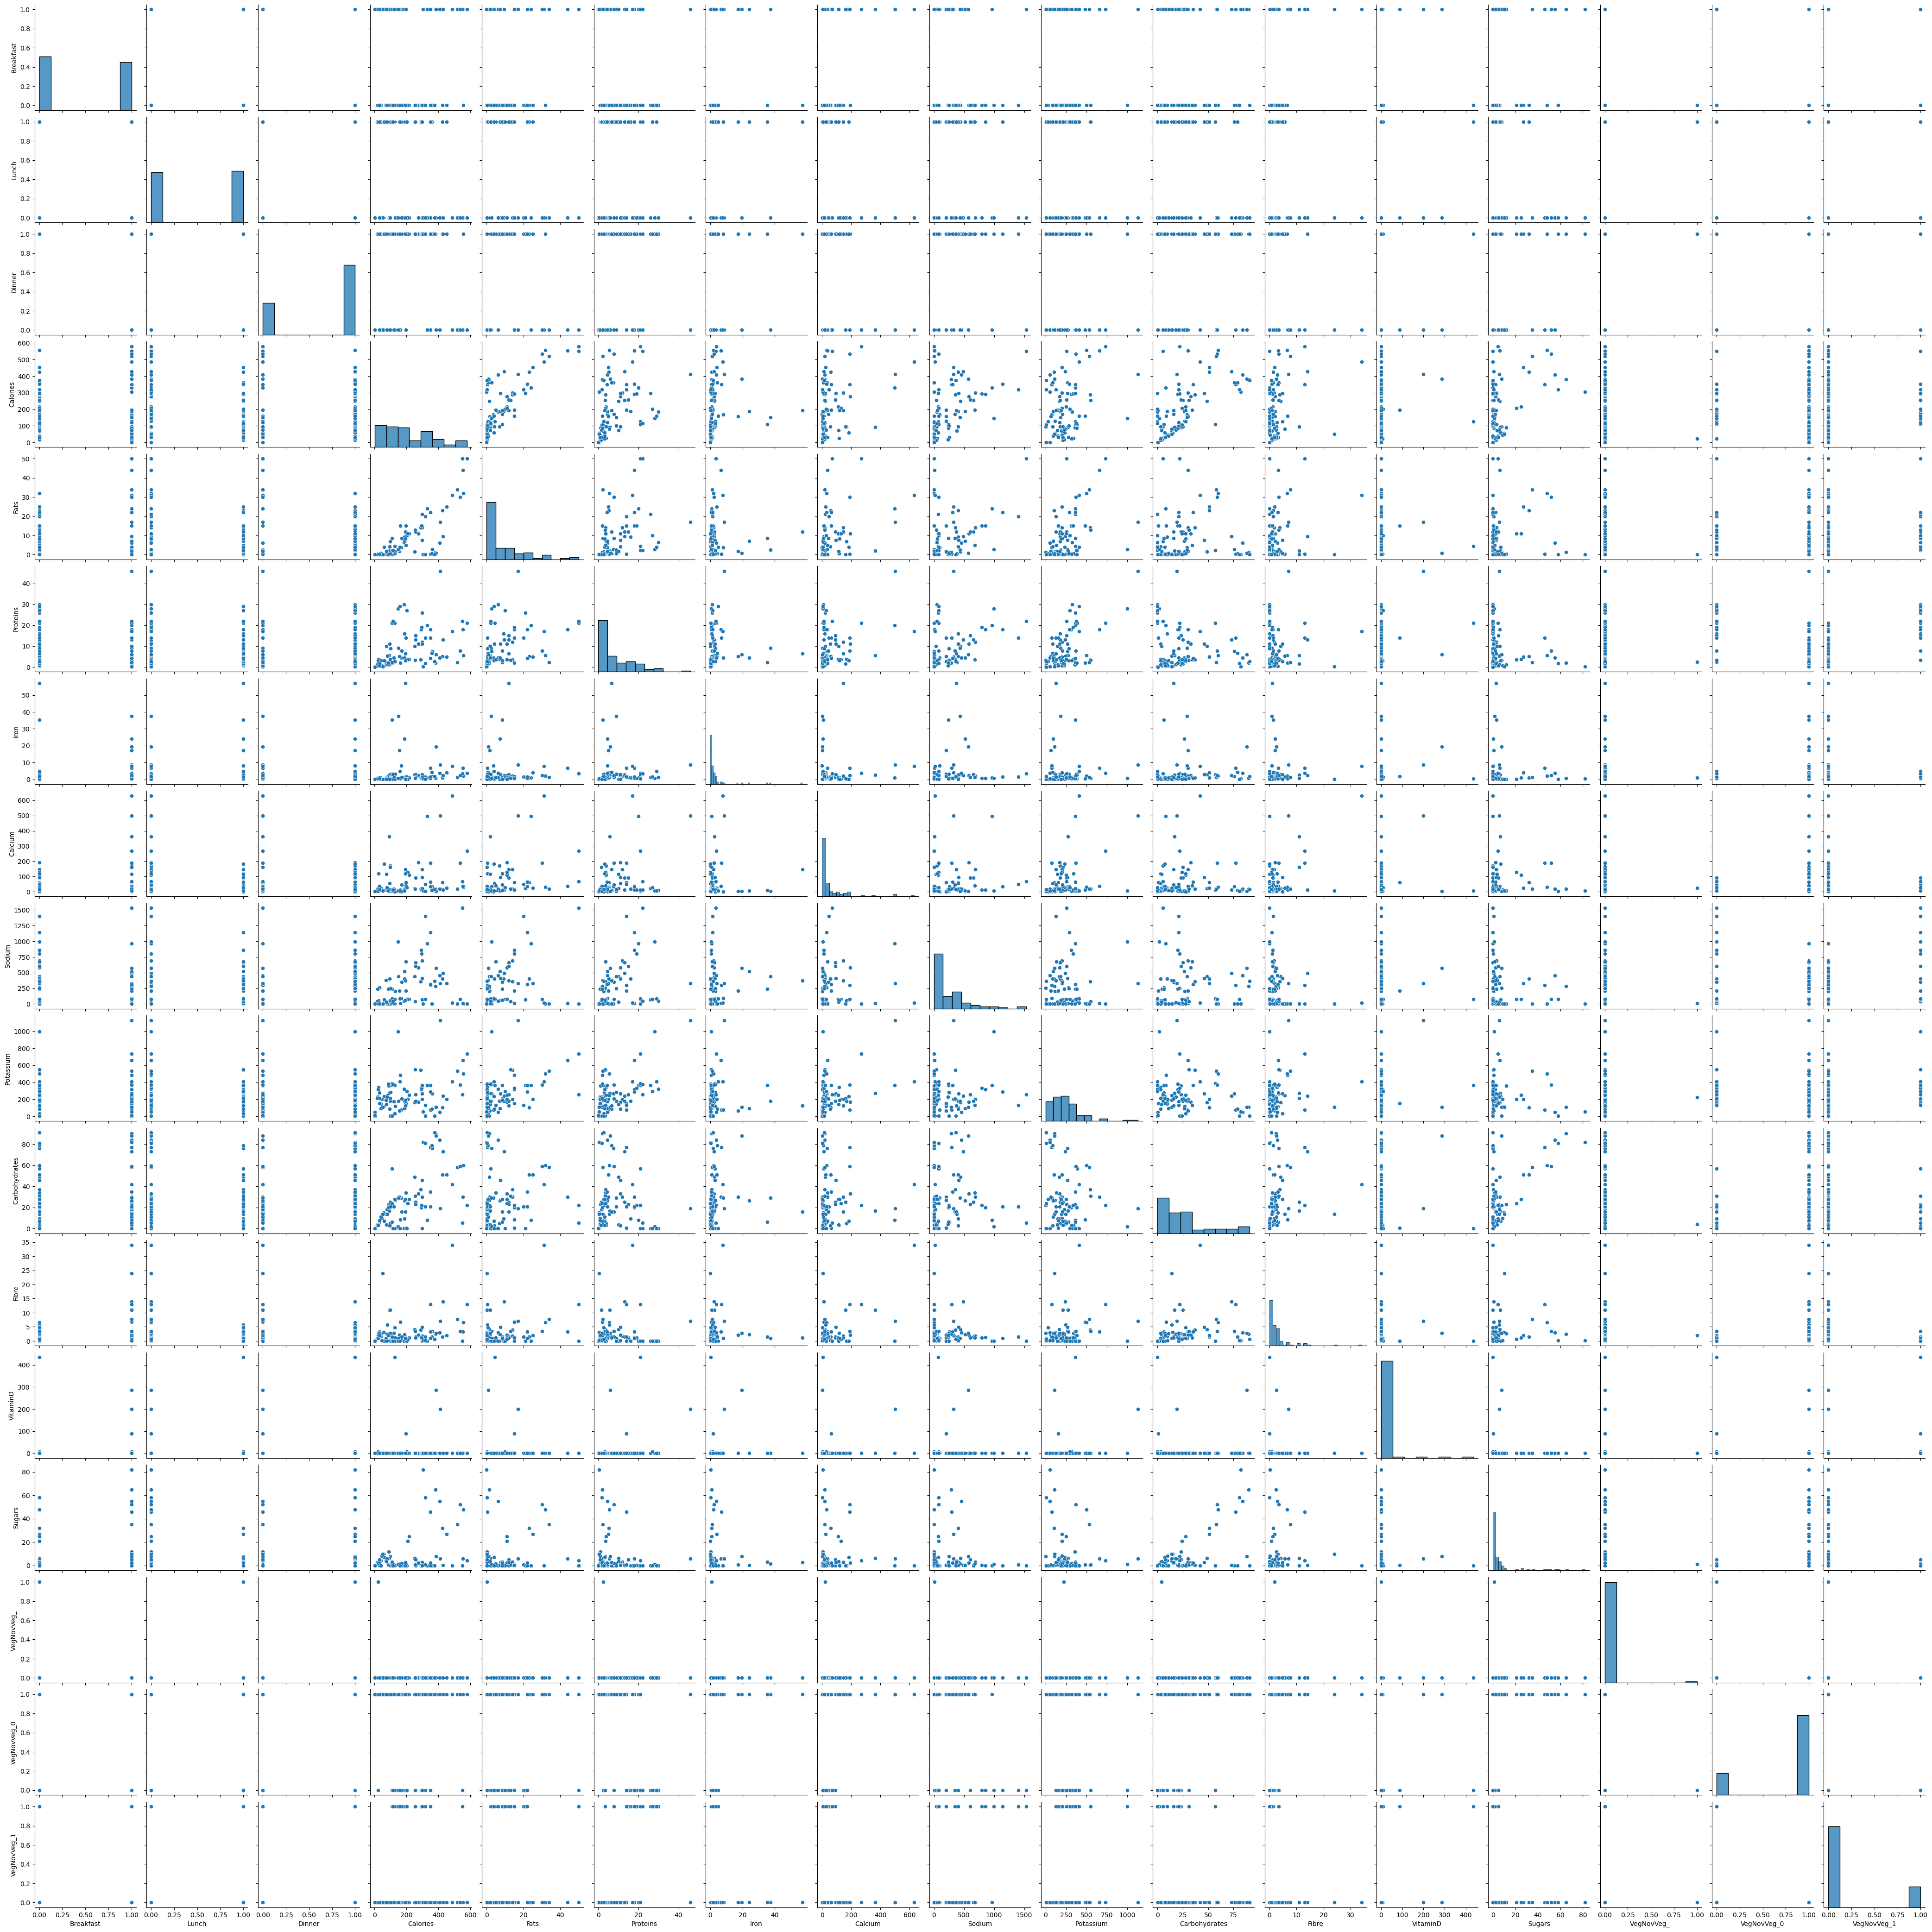

In [13]:

# Visualize the distribution of each numerical column
food.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Select only numeric columns for correlation calculation
numeric_columns = food.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = food[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='viridis')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()


# Boxplot for each numerical column
food.boxplot(figsize=(12, 8))
plt.show()

# Pairplot to visualize relationships between pairs of variables
sns.pairplot(food)
plt.show()

In [14]:
DisDif = pd.read_csv('./dieasediff.csv')

In [15]:
DisDif.head()

,Meal_Id,Name,catagory,description,Veg_Non,Nutrient,Disease,Diet,Price
0,meal_id1,summer squash salad,salad,"white balsamic vinegar, lemon juice, lemon rin...",veg,fiber,obesity diabeties hypertension goitre,alkaline_diet low_fat_diet ketogenic_diet low...,485
1,meal_id2,chicken minced salad,salad,"olive oil, chicken mince, garlic (minced), oni...",non-veg,fiber,anemia pregnancy hypertension rickets goitre ...,low_fat_diet low_carb_diet ketogenic_diet low...,600
2,meal_id3,sweet chilli almonds,chilli,"almonds whole, egg white, curry leaves, salt, ...",veg,vitamin_a,hypertension scurvy heart_disease goitre kidn...,alkaline_diet low_fat_diet paleo_diet Mediter...,255
3,meal_id4,tricolour salad,salad,"vinegar, honey/sugar, soy sauce, salt, garlic ...",veg,fiber,obesity goitre hypertension,low_fat_diet ketogenic_diet low_sodium_diet h...,615
4,meal_id5,gluten-free christmas cake,cake,"christmas dry fruits (pre-soaked), orange zest...",veg,vitamin_a,goitre kidney_disease,high_protien_diet,465


In [16]:
DisDif.tail()

,Meal_Id,Name,catagory,description,Veg_Non,Nutrient,Disease,Diet,Price
507,meal_id305,sunga pork,curry,curry,veg,iron,pregnancy goitre,low_fat_diet paleo_diet vegan_diet high_fiber...,605
508,meal_id306,banana chips,banana,r dried slices of bananas (fruits of herbaceou...,veg,magnesium,hypertension,alkaline_diet high_protien_diet vegan_diet hi...,295
509,meal_id307,bhurji- egg,egg,"made using indian spices, onion, tomatoes, gre...",non-veg,vitamin_a,hypertension rickets goitre kidney_disease pr...,low_sodium_diet high_protien_diet low_fat_die...,645
510,meal_id308,flattened rice / pohe,rice,"ible, dehusked rice which is flattened into fl...",veg,carbohydrates,anemia cancer scurvy heart_disease eye_diseas...,alkaline_diet low_fat_diet ketogenic_diet veg...,525
511,meal_id309,puffed rice,rice,grain made from rice; usually made by heating ...,veg,carbohydrates,obesity diabeties anemia,high_protien_diet vegan_diet dash_diet ketoge...,265


In [17]:
DisDif.shape

(512, 9)

In [18]:
DisDif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Meal_Id      512 non-null    object
 1   Name         512 non-null    object
 2   catagory     512 non-null    object
 3   description  511 non-null    object
 4   Veg_Non      512 non-null    object
 5   Nutrient     512 non-null    object
 6   Disease      512 non-null    object
 7   Diet         512 non-null    object
 8   Price        512 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 36.1+ KB


In [19]:
DisDif.isna().sum()

Meal_Id        0
Name           0
catagory       0
description    1
Veg_Non        0
Nutrient       0
Disease        0
Diet           0
Price          0
dtype: int64

In [20]:
DisDif.isna().sum().sum()

1

In [21]:
DisDif.dropna(subset=['description'], inplace=True)

In [22]:
DisDif.isna().sum()

Meal_Id        0
Name           0
catagory       0
description    0
Veg_Non        0
Nutrient       0
Disease        0
Diet           0
Price          0
dtype: int64

In [23]:
DisDif.columns

Index(['Meal_Id', 'Name', 'catagory', 'description', 'Veg_Non', 'Nutrient',
       'Disease', 'Diet', 'Price'],
      dtype='object')

In [24]:
DisDif = DisDif.drop(columns=['Price'])

In [25]:
DisDif.shape
DisDif.duplicated().sum()

133

In [26]:
DisDif.drop_duplicates(inplace=True)

In [27]:
DisDif.duplicated().sum()

0

In [28]:
DisDif.shape

(378, 8)

In [29]:
DisDif.describe()

,Meal_Id,Name,catagory,description,Veg_Non,Nutrient,Disease,Diet
count,378,378,378,378,378,378,378,378
unique,308,308,78,327,2,17,124,141
top,meal_id46,steam bunny chicken bao,chicken,"buns, all purpose white flour, dry yeast, suga...",veg,iron,anemia rickets goitre kidney_disease pregnancy,low_fat_diet low_carb_diet vegan_diet high_fi...
freq,5,5,60,4,231,88,56,46


In [30]:
DisDif.nunique()

Meal_Id        308
Name           308
catagory        78
description    327
Veg_Non          2
Nutrient        17
Disease        124
Diet           141
dtype: int64

In [31]:
food_list = DisDif['Name'].unique().tolist()

In [32]:
print("Foodstuff List:")
print('-' * 20)  # Separator for better readability

for food_item in food_list:
    print(food_item)

Foodstuff List:
--------------------
summer squash salad
chicken minced salad
sweet chilli almonds
tricolour salad
gluten-free christmas cake
japanese curry arancini with  barley salsa
chocolate nero cookies
lamb and chargrilled bell pepper soup
cream of almond soup
broccoli and almond soup
coconut lime quinoa salad
lemon honey glazed sous vide corn on the cob
watermelon and strawberry smoothie
peach, raspberry and nuts smoothie
almond and cranberry poha
almond and raw banana galawat
baked namakpara with roasted almond dip
grilled almond barfi (sugar free)
baked shankarpali recipe
baked multigrain murukku
apple rabdi
baked namak para
dates and nuts ladoo
green lentil dessert fudge
cashew nut cookies
almond pearls
hawaiin papaya salad
vegetable som tam salad
spinach and feta crepes
couscous with ratatouille - tangy tomato sauce
baked almond kofta
almond and amaranth ladoo
moong dal kiwi coconut soup
mixed berry &amp; banana smoothie
banana walnut smoothie
spicy watermelon soup
red rice 

In [33]:
catagory_list = DisDif['catagory'].unique().tolist()
print("Catagory List:")
print('-' * 20)  # Separator for better readability

for type in catagory_list:
    print(type)

Catagory List:
--------------------
salad
chilli
cake
barley
cookie
soup
corn
smoothie
poha
banana
dip
barfi
shankarpali
baked
rabdi
ladoo
dessert
almond
spinach
sauce
kofta
potato
khichdi
snacks
dal
modak
chocolate
gujiya
pizza
cheese
halwa
apple
sangria
tea
margarita
cardamom
milk
coffee
chicken
meat
curry
fish
rice
butter
egg
wine
coriander
kebabs
crab
bread
kheer
kaju
samosa
rabri
coconut
dosa
bao
wrapped
kebab
chop
strawberry
roasted
vanilla
yogurt
pie
pancakes
lamb
gulab
pudding
broccoli
tomato
korma
pakode
berry
bruschetta
tikka
mango
matar


In [34]:
nutrient_list = DisDif['Nutrient'].unique().tolist()

In [35]:
print("Nutrient List:")
print('-' * 20)  # Separator for better readability

for nutri in nutrient_list:
    print(nutri)

Nutrient List:
--------------------
fiber
vitamin_a
calcium
magnesium
sodium
vitamin_c
protien
vitamin_e
iron
selenium
carbohydrates
chloride
potassium
vitamin_d
manganese
phosphorus
iodine


In [36]:
disease_list = DisDif['Disease'].unique().tolist()
print(disease_list)

[' obesity diabeties hypertension goitre', ' anemia pregnancy hypertension rickets goitre kidney_disease obesity', ' hypertension scurvy heart_disease goitre kidney_disease pregnancy', ' obesity goitre hypertension', ' goitre kidney_disease', ' goitre', ' hypertension heart_disease', ' pregnancy scurvy goitre kidney_disease obesity', ' obesity cancer hypertension', ' pregnancy hypertension scurvy obesity diabeties', ' pregnancy hypertension scurvy goitre obesity', ' diabeties goitre scurvy', ' scurvy', ' anemia cancer heart_disease kidney_disease obesity diabeties', ' hypertension', ' anemia hypertension cancer scurvy heart_disease kidney_disease diabeties', ' goitre hypertension kidney_disease', ' goitre hypertension', ' diabeties goitre', ' obesity diabeties', ' anemia hypertension scurvy heart_disease goitre kidney_disease pregnancy diabeties', ' obesity scurvy hypertension goitre', ' hypertension scurvy heart_disease goitre kidney_disease obesity', ' anemia scurvy goitre kidney_dis

In [37]:
unique_disease = []

for diseases_string in disease_list:
    individual_strings = diseases_string.split(', ')
    
    for individual_string in individual_strings:
        diseases_list = individual_string.split()
        
        for diseases in diseases_list:
            disease_names = diseases.split(', ')
            
            if disease_names not in unique_disease :
                unique_disease.append(disease_names)

print(unique_disease)

[['obesity'], ['diabeties'], ['hypertension'], ['goitre'], ['anemia'], ['pregnancy'], ['rickets'], ['kidney_disease'], ['scurvy'], ['heart_disease'], ['cancer'], ['eye_disease']]


In [38]:
print("Disease List:")
print('-' * 20)  # Separator for better readability

for disease in unique_disease:
    print(disease)

Disease List:
--------------------
['obesity']
['diabeties']
['hypertension']
['goitre']
['anemia']
['pregnancy']
['rickets']
['kidney_disease']
['scurvy']
['heart_disease']
['cancer']
['eye_disease']


In [39]:
uni_diseases = [''.join(element).replace('[', '').replace(']', '').replace("'", '') for element in unique_disease]
print(uni_diseases)

['obesity', 'diabeties', 'hypertension', 'goitre', 'anemia', 'pregnancy', 'rickets', 'kidney_disease', 'scurvy', 'heart_disease', 'cancer', 'eye_disease']


In [40]:
for disease in uni_diseases:
    print(disease)

obesity
diabeties
hypertension
goitre
anemia
pregnancy
rickets
kidney_disease
scurvy
heart_disease
cancer
eye_disease


In [41]:
diet_list = DisDif['Diet'].unique().tolist()

In [42]:
unique_diet = []

for types in diet_list:
    diet_types = types.split()
    for diet in diet_types:    
        if diet not in unique_diet :
            unique_diet.append(diet)

print(unique_diet)

['alkaline_diet', 'low_fat_diet', 'ketogenic_diet', 'low_sodium_diet', 'high_fiber_diet', 'high_protien_diet', 'dash_diet', 'low_carb_diet', 'vegan_diet', 'hormone_diet', 'type_a_diet', 'paleo_diet', 'Mediterranean_diet', 'gluten_free_diet', 'omni_diet', 'type_o_diet']


In [43]:
print("Disease List:")
print('-' * 20)  # Separator for better readability

for diet_nm in unique_diet:
    print(diet_nm)

Disease List:
--------------------
alkaline_diet
low_fat_diet
ketogenic_diet
low_sodium_diet
high_fiber_diet
high_protien_diet
dash_diet
low_carb_diet
vegan_diet
hormone_diet
type_a_diet
paleo_diet
Mediterranean_diet
gluten_free_diet
omni_diet
type_o_diet


In [44]:
pip install detect

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for detect: filename=detect-2020.12.3-py3-none-any.whl size=1449 sha256=e21eeeab0345dec4a9093320db3308b322be76207b634b87e35f886c00ca17f1
  Stored in directory: c:\users\abhay\appdata\local\pip\cache\wheels\94\01\4e\705b429191da18d47b623dbe10eb2abeb5fa472b914cc1a106
Successfully built detect
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
pip install langdetect

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     --- ----------------------------------- 92.2/981.5 kB 5.5 MB/s eta 0:00:01
     ---- --------------------------------- 122.9/981.5 kB 1.8 MB/s eta 0:00:01
     ------- ------------------------------ 194.6/981.5 kB 1.7 MB/s eta 0:00:01
     -------- ----------------------------- 225.3/981.5 kB 1.7 MB/s eta 0:00:01
     ------------- ------------------------ 337.9/981.5 kB 1.8 MB/s eta 0:00:01
     --------------- ---------------------- 409.6/981.5 kB 1.7 MB/s eta 0:00:01
     ------------------ ------------------- 481.3/981.5 kB 1.8 MB/s eta 0:00:01
     ---------------------- --------------- 593.9/981.5 kB 1.8 MB/s eta 0:00:01
     ------------------------ ------------- 624.6/981.5 kB 1.7 MB/s eta 0:00:01
     ---------------------------- --------- 737.3/981.5 kB 1.8 MB/s eta 0:00:01
     ------------------------------- ------ 809.0/981.


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
pip install googletrans

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/55.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/55.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/55.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/55.1 kB ? eta -:--:--
   ------- -------------------------------- 10.2/55.1 kB ? eta -:--:--
   ------- -------------------------------- 10.2/55.1 kB ? eta -:--:--
   ------- -------------------------------- 10.2/55.1 kB ? eta -:--:--
   ---------------------- ----------------- 30.7/55.1 kB 119.1 kB/s eta 0:00:01
   ----------------------------- ---------- 41.0/55.1 kB 140.3 kB/s eta 0:00:01
   ------------------------------------- -- 51.2/55.1 kB 163.8 kB/s eta 0:00:01
   ---------------------------------------- 55.1/55.1 kB 168.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   -----------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from langdetect import detect
from googletrans import Translator

def translate_description(description):
    if detect(description) != 'en':
        translator = Translator()
        translated = translator.translate(description, src='auto', dest='en')
        return translated.text
    else:
        return description

In [48]:
food_item = input("Enter the food item: ")
description_components = DisDif[DisDif['Name'] == food_item]['description'].values
if len(description_components) > 0:
    print("Description components of", food_item, ":", translate_description(description_components[0]))
else:
    print("Food item not found in the dataset")


Food item not found in the dataset


In [49]:
# Assuming the user-inputted food item is stored in a variable called user_input
user_input = "pasta in cheese sauce"  # Example food item entered by the user
# Check if the food item exists in the DataFrame
if user_input in DisDif['Name'].values:
    # Get the description of the food item
    description = DisDif.loc[DisDif['Name'] == user_input, 'description'].values[0]
    
    # Check if the description is in English
    if detect(description) != 'en':
        # Translate the description to English
        translated_description = translate_description(description)
        print("Description:", translated_description)
    else:
        print("Description:", description)
else:
    print("Food item not found in the dataset")

AttributeError: 'NoneType' object has no attribute 'group'

In [50]:
def calculate_bmi(weight, height):
    if weight <= 0 or height <= 0:
        raise ValueError("Weight and height must be positive values.")
    bmi = weight / (height ** 2)
    return bmi


def interpret_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal weight"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"


def calculate_calories(weight, height, age, gender, activity_level):
    if weight <= 0 or height <= 0 or age <= 0:
        raise ValueError("Weight, height, and age must be positive values.")
    if gender.lower() not in ['male', 'female']:
        raise ValueError("Invalid gender. Use 'male' or 'female'.")
    activity_levels = {'sedentary': 1.2, 'moderate': 1.55, 'active': 1.9}
    if activity_level.lower() not in activity_levels:
        raise ValueError("Invalid activity level. Use 'sedentary', 'moderate', or 'active'.")
    bmr = calculate_bmr(weight, height, age, gender)
    calories = bmr * activity_levels[activity_level.lower()]
    return calories


def calculate_bmr(weight, height, age, gender):
    if weight <= 0 or height <= 0 or age <= 0:
        raise ValueError("Weight, height, and age must be positive values.")
    if gender.lower() not in ['male', 'female']:
        raise ValueError("Invalid gender. Use 'male' or 'female'.")
    if gender.lower() == 'male':
        bmr = 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)
    else:
        bmr = 447.593 + (9.247 * weight) + (3.098 * height) - (4.330 * age)
    return bmr


In [51]:
weight_kg = 70
height_m = 1.75
bmi = calculate_bmi(weight_kg, height_m)
print(f"BMI: {bmi:.2f} - {interpret_bmi(bmi)}")

weight_kg = 70
height_cm = 175
age = 25
gender = 'male'
activity_level = 'active'
calories = calculate_calories(weight_kg, height_cm, age, gender, activity_level)
print(f"Daily Calorie Needs: {calories:.2f} calories")

BMI: 22.86 - Normal weight
Daily Calorie Needs: 3275.70 calories
